In [2]:
#establishing environment
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import scipy
from scipy.stats import pearsonr
from scipy import signal as sig
from scipy.io import loadmat, savemat
!pip install git+https://github.com/ieeg-portal/ieegpy.git # Install ieegpy toolbox directly from github
from ieeg.auth import Session

  Cloning https://github.com/ieeg-portal/ieegpy.git to /private/var/folders/j3/ps9_bddj0kg0ds3px8t769_00000gn/T/pip-req-build-1ccwijz3
  Running command git clone -q https://github.com/ieeg-portal/ieegpy.git /private/var/folders/j3/ps9_bddj0kg0ds3px8t769_00000gn/T/pip-req-build-1ccwijz3
  Resolved https://github.com/ieeg-portal/ieegpy.git to commit 080bfa42a8503380ef164b5e7b116613f75073bb


In [9]:
T_test = np.load('/Users/carlosaguila/PycharmProjects/CNT_Interictal_Spikes/Results_v1/t_test_output_20rand_1.npy', allow_pickle=True)

In [85]:
channels = T_test[:,0]
pval = T_test[:,1]
X = []
for i in range(len(pval)):
    X.append([channels[i],pval[i].pvalue])

pval_all = []
for i in range(len(pval)):
    pval_all.append(pval[i].pvalue)

In [66]:
chlabels_203 = loadmat('/Users/carlosaguila/PycharmProjects/CNT_Interictal_Spikes/Results_v1/chLabels_HUP203_phaseII.mat')
chlabels_203 = chlabels_203['ch_labels_all']
SOZ_hup203 = ['LA1-CAR', 'LA2-CAR', 'LA3-CAR', 'LA4-CAR', 'LB5-CAR', 'LB6-CAR', 'RB9-CAR', 'RB10-CAR', 'RB11-CAR', 'RE9-CAR', 'RE10-CAR', 'RE11-CAR', 'RF9-CAR', 'RF10-CAR', 'RF11-CAR', 'RG9-CAR', 'RG10-CAR', 'RG11-CAR', 'RB1-CAR', 'RB2-CAR', 'RC1-CAR', 'RC3-CAR']

SOZ_find = []
for i in range(len(SOZ_hup203)):
    find = np.where(SOZ_hup203[i] == chlabels_203[0][0])[0]
    SOZ_find.append(find)
    
SOZ_find = np.concatenate(SOZ_find)

SOZ_find2 = [x+1 for x in SOZ_find]

In [126]:
find_ch = []
for i in range(len(SOZ_find2)):
    find = np.where(SOZ_find2[i] == X)[0]
    find_ch.append(find)
    
find_ch = np.concatenate(find_ch) #index in our pvalue matrix of where the respective SOZ channel is

In [169]:
print(find_ch)

[0 1 2 3 13 41 42 43 33 34 45 47]


In [202]:
pval_indexed = []
for i in find_ch:
    pval_indexed.append(pval_all[i])

In [203]:
pval_indexed

[5.848174479772292e-09,
 0.001450242328980792,
 0.00399737516494066,
 2.5018838243913257e-06,
 nan,
 1.0,
 1.0,
 1.0,
 2.738179382517534e-29,
 9.947010399073308e-11,
 0.009588548230505345,
 0.9999999996476905]

Text(0, 0.5, '-log10(pvalue)')

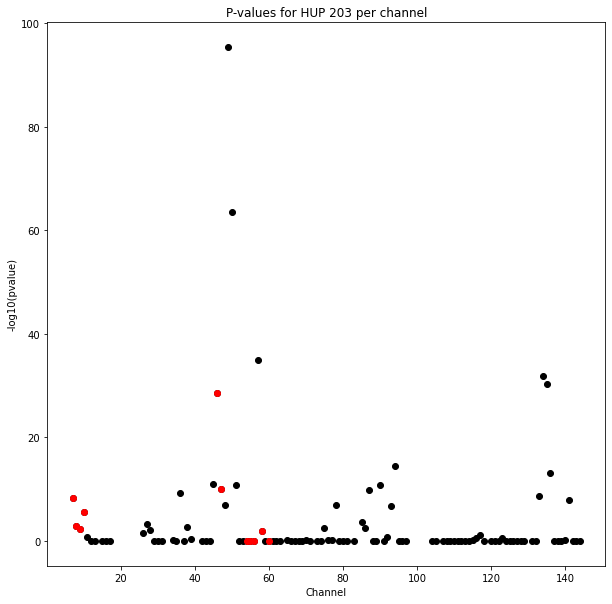

In [206]:
plt.figure(figsize=(10,10))
plt.plot(channels,np.log10(pval_all)*(-1),'ko')
plt.plot(channels[test_ch],np.log10(pval_indexed)*(-1),'ro')
plt.title('P-values for HUP 203 per channel')
plt.xlabel('Channel')
plt.ylabel('-log10(pvalue)')